Text(0, 0.5, 'Credit Value Over 90 Days')

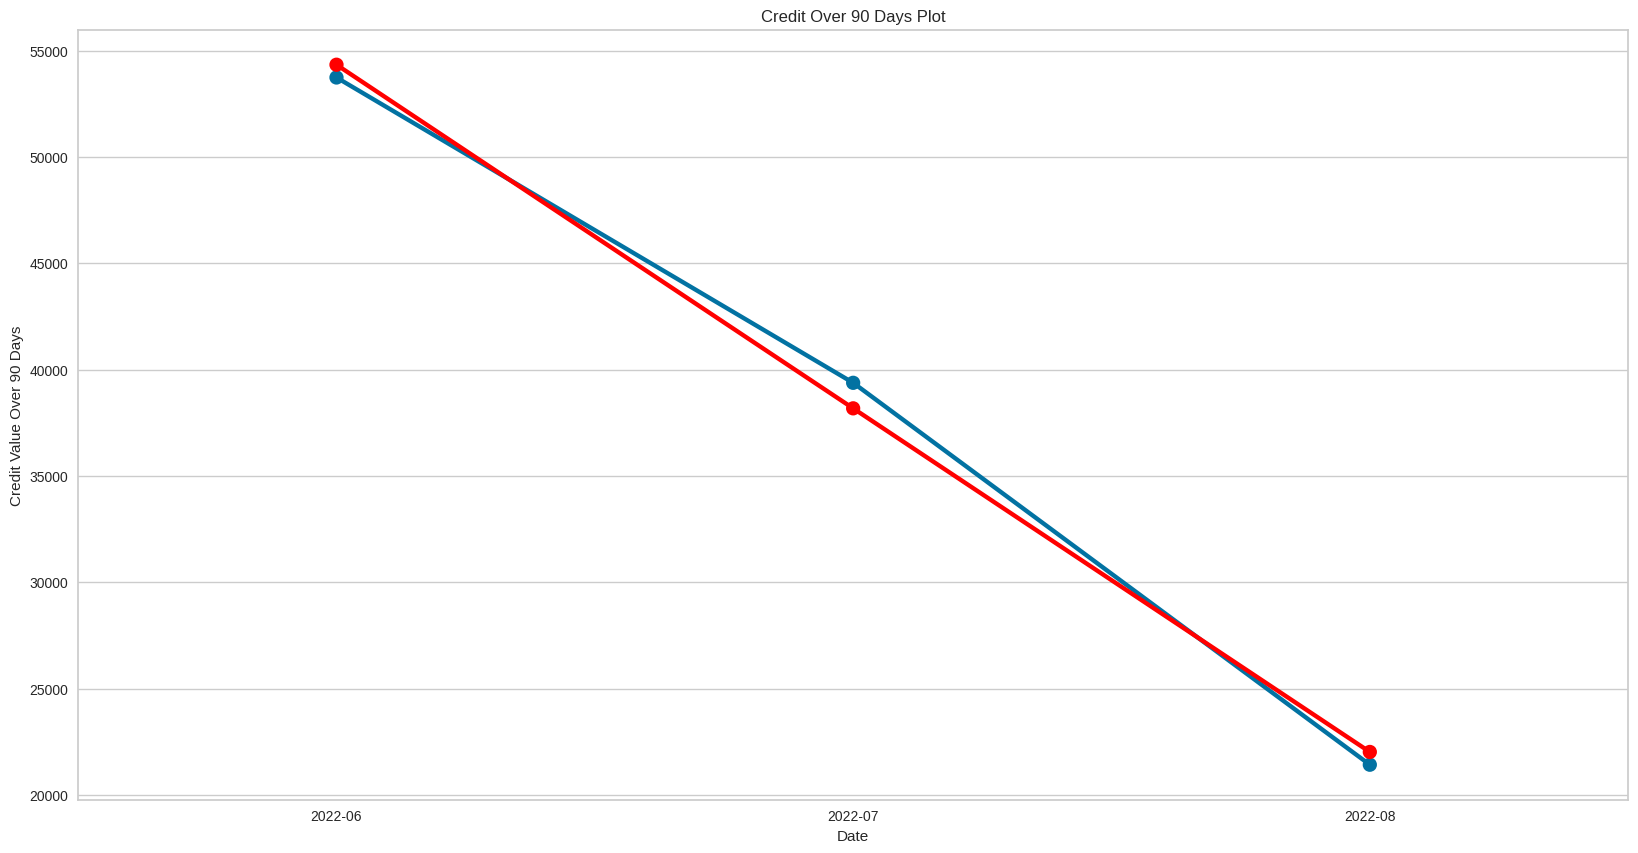

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import yellowbrick as yb
import seaborn as sns
import statistics as sts

df_credit_modeling = pd.read_csv('book_scr.csv', encoding = 'latin-1')

#Using a CPF wich has a lot of credit
cpf = 9993287432

#Creating DF for consignado_valor_credito_vencer_acima_90_dia
df_cpf_credit = df_credit_modeling.loc[df_credit_modeling['chave_cpf'] == cpf]
df_cpf_credit = df_cpf_credit.loc[:,['data_consulta_dado_bacen', 'consignado_valor_credito_vencer_acima_90_dia']].reset_index(drop=True)

#Creating Linear Regression
x = np.array(list(df_cpf_credit.index))
y = df_cpf_credit['consignado_valor_credito_vencer_acima_90_dia'].values

x = x.reshape(-1, 1)

LinearRegression = skl.linear_model.LinearRegression()

LinearRegression.fit(x, y)

#Ploting the Linear Regression
plt.figure(figsize=(20,10))
plt.title("Credit Over 90 Days Plot")

sns.pointplot(data=df_cpf_credit, x='data_consulta_dado_bacen', y='consignado_valor_credito_vencer_acima_90_dia', errorbar=('ci', False));
sns.pointplot(data=df_cpf_credit, x='data_consulta_dado_bacen', y=LinearRegression.predict(x), errorbar=('ci', False), color='red');

plt.xlabel("Date")
plt.ylabel("Credit Value Over 90 Days")